In [396]:
library(hms)
library(tidyverse)
library(readxl)
library(ggplot2)
library(SIAMCAT)
library(data.table)
library(vegan)
library(RColorBrewer)
source('packages.r')

In [397]:
rarefyDepth <- 500

In [398]:
for (f in list.files("/g/scb2/zeller/SHARED/DATA/metadata/")){
    print(f)
}

[1] "Ananthakrishnan_2017_CellHostMicrobe"
[1] "Backhed_2015_CellHostMicrobe"
[1] "Bahram_2018_Nature"
[1] "Baxter_2016_GenomeMed"
[1] "Bedarf_2017_GenomeMed"
[1] "Brito_2016_Nature"
[1] "Bullman_2017_Science"
[1] "Burns_2017_GenomeMed"
[1] "Callahan_2017_PNAS"
[1] "Castellarin_2012_GenomeMed"
[1] "CastroNaller_2015_PeerJ"
[1] "Chen_2018_ISME"
[1] "Clausen_2018_JAMADermatology"
[1] "Daniel_metadata"
[1] "Dzunkova_2019_NatMicrobiol"
[1] "Fan_2018_Gut"
[1] "Feng_2015_NatComm"
[1] "Fettweis_2019_NatMed"
[1] "Flemer_2018_Gut"
[1] "Forsell_2017_BMCMicrobiol"
[1] "Frankel_2017_Neoplasia"
[1] "Franzosa_NatMed_2019"
[1] "Goodrich_2014_Cell"
[1] "Hale_2018_GenomeMed"
[1] "Hall_2017_GenomeMedicine"
[1] "Hannigan_2018_mBio"
[1] "Hayes_2018_JAMAOncology"
[1] "He_2017_GigaScience"
[1] "Heintz-Buschart_2016_NatMicrobiol"
[1] "HMP_2012_Nature_stool"
[1] "Hoyles_2018_NatMed"
[1] "Hsu_2016_mSystems"
[1] "Jie_2017_NatComm"
[1] "Johnson_2019_CellHostMicrobe"
[1] "Karlsson_2013_Nature"
[1] "Kostic_2012_Ge

### TODO

- Link TwinsUK [done]
- Match sampleIDs between profiles and metadata for Bedarf...
- Include US-CRC (Vogtmann)?
- Include Forslund cohort? Understand which samples in that cohort are actually new

In [399]:
metadata_map <- c("Backhed_2015_CellHostMicrobe" = "meta_backhed.tsv",
                    "Bedarf_2017_GenomeMed" = "meta_bedarf.tsv",
                    "Feng_2015_NatComm" = "cleaned_metadata.tsv",
                    "Franzosa_NatMed_2019" = "meta_franzosa.tsv",
                    "He_2017_GigaScience" = "meta_he.tsv",
                    "Hoyles_2018_NatMed" = "meta_hoyles.tsv",
                    "Jie_2017_NatComm" = "meta_jie_minimal.tsv",
                    "Karlsson_2013_Nature" = "meta_SE-T2D.tsv",
                    "Kushugolova_2018_BMJOpen" = "meta_kushugolova.tsv",
                    "LeChatelier_2013_Nature" = "meta_lechatelier.tsv",
                    "Lewis_2015_CellHostMicrobe" = "meta_lewis.tsv",
                    "Li_2017_Microbiome" = "meta_Li.tsv",
                    "Lloyd-Price_2019_Nature" = "meta_lloyd_price_metaG.tsv",
                    "Loomba_2017_CellMetab" = "meta_loomba.tsv",
                    "Palleja_2019_NatMicrobiol" = "meta_palleja.tsv",
                    "Poyet_2019_NatMedicine" = "meta_poyet.tsv",
                    "Qin_2012_Nature_2" = "meta_cn_t2d.tsv",
                    "Qin_2014_Nature" = "meta_qin.tsv",
                    "Schirmer_2016_Cell" = "meta_schirmer.tsv",
                    "Suez_2018_Cell" = "meta_suez_raw.tsv",
                    "Thomas_2019_NatMedicine" = "cleaned_metadata.tsv",
                    "Vincnet_2016_Microbiome" = "meta_vincent.tsv",
                    "Wen_2017_GenomeBiol" = "meta_wen.tsv",
                    "Wirbel_2019_NatMedicine" = "cleaned_metadata.tsv",
                    "Yachida_2019_NatMedicine" = "meta_Yachida_2019.tsv",
                    "Yu_2017_Gut" = "cleaned_metadata.tsv",
                    "Zeevi_2015_Cell" = "meta_zeevi_updated.tsv",
                    "Zeller_2014_MSB" = "cleaned_metadata.tsv",
                    "Zhang_205_NatMed" = "meta_zhang.tsv",
                    "Zhu_2018_Microbiome" = "meta_zhu.tsv",
                    "Nielsen_2014_NatBiotechnol" = "meta_metaHIT-IBD.tsv",
                    "Xie_2016_CellSyst_2" = "meta_xie.tsv")


In [400]:
data <- list()
for (file in list.files("/g/scb2/zeller/karcher/dysb_classif/data/siamcat/profiles")){
    base = str_split(file, "[.]motus")[[1]][1]
    print(str_c("Profile basename:", base))
    me <- list.files("/g/scb2/zeller/SHARED/DATA/metadata/")
    me <- me[str_detect(me, base)]
    if (length(me) == 0){
        print(str_c("Metadata: ", "### Unclear ###"))
    } else {
        for (m in me){
            metadata <- read_tsv(str_c("/g/scb2/zeller/SHARED/DATA/metadata/",
                                      m, 
                                      "/",
                                      metadata_map[[m]]))
        }        
    }
    
    profile <- read_tsv(str_c("/g/scb2/zeller/karcher/dysb_classif/data/siamcat/profiles/", file),
                       skip = 61)
    data[[length(data) + 1]] <- list(profile, metadata)
    names(data)[length(data)] <- base

    print("################################################")
    print("################################################")
    print("################################################")
}

[1] "Profile basename:Backhed_2015_CellHostMicrobe"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Description = col_character(),
  Group = col_character(),
  Pair = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Bedarf_2017_GenomeMed"


Parsed with column specification:
cols(
  Group = col_character(),
  AB_taken = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  Gender = col_character(),
  Smoking = col_double(),
  Diet = col_character(),
  Sample_ID = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Feng_2015_NatComm"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_double(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  AJCC_stage = col_character(),
  TNM_stage = col_character(),
  Localization = col_character(),
  Study = col_character(),
  Sampling_rel_to_colonoscopy = col_character(),
  FOBT = col_logical(),
  Group = col_character(),
  Diabetes = col_double(),
  Vegetarian = col_double(),
  Smoking = col_double(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Franzosa_NatMed_2019"


Parsed with column specification:
cols(
  External_ID = col_character(),
  Age = col_double(),
  Fecal.calprotein = col_double(),
  Antibiotics = col_character(),
  Mesalamine = col_character(),
  Steroids = col_character(),
  Group = col_character(),
  Immunosuppressant = col_character(),
  Sample_ID = col_character(),
  Country = col_character(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:He_2017_GigaScience"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Gender = col_character(),
  Age = col_character(),
  BMI = col_character(),
  Height = col_character(),
  Weight = col_character(),
  Group = col_character(),
  Nutritional_status = col_character(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Hoyles_2018_NatMed"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Age = col_double(),
  BMI = col_double(),
  Sex = col_character(),
  External_ID = col_character(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Jie_2017_NatComm"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Group = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Smoking = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Karlsson_2013_Nature"


Parsed with column specification:
cols(
  .default = col_double(),
  Sample_ID = col_character(),
  Group = col_character(),
  Fasting_glucose = col_character(),
  Adiponectin = col_character(),
  Leptin = col_character(),
  `GLP-1` = col_character(),
  `FGF-19` = col_character(),
  `IL-1` = col_character(),
  CD163 = col_character(),
  Statins = col_character(),
  Insulin = col_character(),
  Medication = col_character()
)

See spec(...) for full column specifications.

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Kushugolova_2018_BMJOpen"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  Gender = col_character(),
  Age = col_double(),
  BMI = col_double(),
  Country = col_character(),
  Group = col_character(),
  Intervention = col_character(),
  Western = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:LeChatelier_2013_Nature"


Parsed with column specification:
cols(
  External_ID = col_character(),
  BMI = col_double(),
  Sample_ID = col_character(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Lewis_2015_CellHostMicrobe"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Group = col_character(),
  Antibiotics_visit = col_character(),
  Response = col_character(),
  Steroids = col_character(),
  Treatment = col_character(),
  Treatment_Specific = col_character(),
  Time = col_double(),
  Subject = col_double(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Li_2017_Microbiome"


Parsed with column specification:
cols(
  Group = col_character(),
  External_ID = col_character(),
  Library_size = col_double(),
  Sample_ID = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Lloyd-Price_2019_Nature"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Library_Size = col_double(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  Gender = col_character(),
  Age = col_double(),
  Group = col_character(),
  BMI = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Loomba_2017_CellMetab"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Nielsen_2014_NatBiotechnol"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Individual_ID = col_character(),
  Country = col_character(),
  Sampling_day = col_double(),
  Gender = col_character(),
  Age = col_double(),
  BMI = col_double(),
  Group = col_character(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Palleja_2019_NatMicrobiol"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  Library_size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Poyet_2019_NatMedicine"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Library_size = col_double(),
  External_ID = col_character(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Qin_2012_Nature_2"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  Group = col_character(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Qin_2014_Nature"


Parsed with column specification:
cols(
  External_ID = col_character(),
  Gender = col_character(),
  Age = col_double(),
  BMI = col_double(),
  Group = col_character(),
  HBV = col_character(),
  Alcohol = col_character(),
  Library_size = col_double(),
  Sample_ID = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Schirmer_2016_Cell"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Library_Size = col_double(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Suez_2018_Cell"


Parsed with column specification:
cols(
  Alias = col_character(),
  Description = col_character(),
  LibrarySelection = col_character(),
  sex = col_character(),
  tissue_type = col_character(),
  Age = col_double(),
  Group = col_character(),
  Participant = col_double(),
  Day = col_double(),
  phase = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Thomas_2019_NatMedicine"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  AJCC_stage = col_logical(),
  TNM_stage = col_logical(),
  Localization = col_logical(),
  Study = col_character(),
  Sampling_rel_to_colonoscopy = col_logical(),
  FOBT = col_logical(),
  Group = col_character(),
  Diabetes = col_logical(),
  Vegetarian = col_logical(),
  Smoking = col_logical(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Vincnet_2016_Microbiome"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Individual_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  Group = col_character(),
  Timepoint = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Wen_2017_GenomeBio"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Gender = col_character(),
  Age = col_double(),
  BMI = col_double(),
  Disease_duration = col_double(),
  Antibiotics = col_character(),
  Peripheral_AS = col_character(),
  NSAIDs = col_character(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Wirbel_2019_NatMedicine"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  AJCC_stage = col_character(),
  TNM_stage = col_character(),
  Localization = col_character(),
  Study = col_character(),
  Sampling_rel_to_colonoscopy = col_character(),
  FOBT = col_logical(),
  Group = col_character(),
  Diabetes = col_logical(),
  Vegetarian = col_logical(),
  Smoking = col_logical(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Xie_2016_CellSyst_2"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  BGI_ID = col_double(),
  Twin_pair_number = col_character(),
  Zygosity = col_character(),
  Sex = col_logical(),
  BMI = col_double(),
  Age_of_separation = col_double(),
  Delivery_mode = col_character(),
  Menopause = col_character(),
  Vegetarian_diet = col_character(),
  Smoking = col_character(),
  Alcohol = col_character(),
  Outdoor_sports = col_character(),
  Metformin = col_character(),
  Medication = col_character(),
  Library_Size = col_double(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Yachida_2019_NatMedicine"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Status = col_character(),
  Subject_ID = col_character(),
  Group = col_character(),
  Stage = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_character(),
  `Brinkman Index` = col_character(),
  Alcohol = col_character(),
  `Tumor location` = col_character(),
  Group_detailled = col_character(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Yu_2017_Gut"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  AJCC_stage = col_character(),
  TNM_stage = col_character(),
  Localization = col_character(),
  Study = col_character(),
  Sampling_rel_to_colonoscopy = col_character(),
  FOBT = col_logical(),
  Group = col_character(),
  Diabetes = col_double(),
  Vegetarian = col_logical(),
  Smoking = col_double(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Zeevi_2015_Cell"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  BMI = col_double(),
  Age = col_double(),
  Gender = col_double(),
  Library_Size = col_double(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Zeller_2014_MSB"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Age = col_double(),
  Gender = col_character(),
  BMI = col_double(),
  Country = col_character(),
  AJCC_stage = col_character(),
  TNM_stage = col_character(),
  Localization = col_character(),
  Study = col_character(),
  Sampling_rel_to_colonoscopy = col_character(),
  FOBT = col_character(),
  Group = col_character(),
  Diabetes = col_logical(),
  Vegetarian = col_logical(),
  Smoking = col_logical(),
  Library_Size = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Zhang_205_NatMed"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  External_ID = col_character(),
  Individual_ID = col_character(),
  Timepoint = col_double(),
  Gender = col_character(),
  Age = col_double(),
  Group = col_character(),
  Treatment = col_character(),
  BMI = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"
[1] "Profile basename:Zhu_2018_Microbiome"


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Library_size = col_double(),
  Menopause = col_character(),
  Group = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



[1] "################################################"
[1] "################################################"
[1] "################################################"


In [401]:
data <- map2(data, names(data), function(d, na) {
    if (na == "Zhu_2018_Microbiome") {
        tmp <- d[[2]]
        tmp <- tmp %>%
        mutate(Sample_ID = str_replace(Sample_ID, "D$", ""))
        d[[2]] <- tmp
        
        return(d)
    } else if (na == "Qin_2012_Nature_2") {
        tmp <- d[[1]]
        colnames(tmp) <- str_replace(colnames(tmp), "bgi-", "")
        d[[1]] <- tmp
        
        return(d)
    } else if (na == "Suez_2018_Cell") {
        tmp <- d[[2]]
        tmp <- tmp %>%
        mutate(Sample_ID = Alias) %>%
        select(-Alias)
        d[[2]] <- tmp
        
        return(d)
    } else if (na == "Zhang_205_NatMed") {
        tmp <- d[[2]]
        tmp <- tmp %>%
        filter(str_detect(External_ID, "stool"))
        d[[2]] <- tmp
        
        return(d)
    } else {
        return(d)
    }
})

## TODO

- Fix mapping rate between metadata and profiles of Nielsen_2014_NatBiotechnol (is only ~40% right now).
    - I'm actually kicking out this dataset for now because it has also duplicate rownames. Have to talk to Jakob about this
- Get correct mapping table from Jakob at some point to fix Bedarf (is 0% right now).
    - Kicking this out right now too

In [402]:
# Some diagnostics of how many samples we can map between metadata and profiles!
tmp <- map(data, function(x) {
   if ("Sample_ID" %in% colnames(x[[2]])) {
       a <- mean( colnames(x[[1]]) %in% x[[2]]$Sample_ID )
       b <- mean(x[[2]]$Sample_ID %in% colnames(x[[1]]) )    
       return(c(a, b))
   } else {
       return("wrong colname...")
   }
   a <- mean( colnames(x[[1]]) %in% x[[2]]$Sample_ID )
   #b <- sum( colnames(x[[1]]) %in% rownames(x[[2]]) )
    return(a)
})

# Kicking out Nielsen_*
data <- data[which(names(data) != "Nielsen_2014_NatBiotechnol")]
# Kicking out Bedarf
data <- data[which(names(data) != "Bedarf_2017_GenomeMed")]

data.frame(dataset = names(tmp),
                FractionProfileInMeta = map_chr(tmp, function(x) x[1]), 
                FractionMetaInProfile = map_chr(tmp, function(x) x[2])) %>% as_tibble()  %>% print(n=100)

# A tibble: 32 x 3
   dataset                      FractionProfileInMeta FractionMetaInProfile
   <fct>                        <fct>                 <fct>                
 1 Backhed_2015_CellHostMicrobe 0.997506              1.000000             
 2 Bedarf_2017_GenomeMed        0.000000              0.000000             
 3 Feng_2015_NatComm            0.993631              1.000000             
 4 Franzosa_NatMed_2019         0.995475              1.000000             
 5 He_2017_GigaScience          0.943089              0.991453             
 6 Hoyles_2018_NatMed           0.986486              1.000000             
 7 Jie_2017_NatComm             0.997409              0.950617             
 8 Karlsson_2013_Nature         0.993151              1.000000             
 9 Kushugolova_2018_BMJOpen     0.994152              1.000000             
10 LeChatelier_2013_Nature      0.996587              1.000000             
11 Lewis_2015_CellHostMicrobe   0.997297              1.000000       

## adapt metadata for one-pass classifier

In order to use the metadata, I need a consistent target label. For this I'm going through the metadata I have manually and create a case/control column.

## TODO: Discuss with Jakob.
- For Hoyles_2018_NatMed, ask Jakob what are cases and what are controls
    - in /g/scb2/zeller/SHARED/DATA/metadata/Hoyles_2018_NatMed/meta_hoyles.tsv it says Fibrosis stage 0 to stage X (I think stage 5?)
- Same for Loomba_2017_CellMetab. Here we have Fibrosis of several stages and it's not clear which are 'cases' and which are 'controls'..
- For Palleja_2019_NatMicrobiol I'm not sure what to do since it's not case controls but instead ABX-treated people sampled over time. Maybe take timepoint 0 as CTRs and ditch the rest?
- Poyet_2019_NatMedicine: MetaG accompanying Eric Alm's isolate collection. Take earliest time point of each individual
- Schirmer_2016_Cell: All samples marked as CTR, yet paper talks about assoc. between dysbiosis and cytokines. Exclude for now, talk to Jakob what he did.
- Suez_2018_Cell: Overwhelming number of levels in Group, not clear what to do here. Talk to Jakob.
- Backhed_2015_CellHostMicrobe: Mother/Infant pairs. We can try to take only mothers for controls; althrough right now we're not making use of cohort studies. So throw out for now
- Vincnet_2016_Microbiome: Take earliest time point of each CTR individual.
- Xie_2016_CellSyst_2: I'm keeping this cohort as-is (so only CTRs). Discuss with Jakob what he thinks.
- Zeevi: I'm keeping as is

In [403]:
data <- data[-which(names(data) %in% c("Hoyles_2018_NatMed",
                                       "Loomba_2017_CellMetab",
                                       "Palleja_2019_NatMicrobiol",
                                       "Schirmer_2016_Cell",
                                        "Suez_2018_Cell",
                                      "Backhed_2015_CellHostMicrobe"))]

In [404]:
dataMetaAdapted <- list()
for (dataset in names(data)){
    print(dataset)
    tmp <- data[which(names(data) == dataset)][[1]]
    if (dataset == "Backhed_2015_CellHostMicrobe") {
        # Swedish mother/infant pairs. 
        # I'm keeping both infants and mothers as controls
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = "control") %>%
        mutate(condition = "No condition")
    } else if (dataset == "Feng_2015_NatComm"){
        # Controls/adenoma/CRC. 
        # I'm keeping only controls and CRC
        tmp[[2]] <- tmp[[2]] %>%
        #filter(Group == "CTR" | Group == "CRC") %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = map_chr(Group, function(g) {
            if (g == "CTR") {
                return("ADA/CRC")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "Franzosa_NatMed_2019"){
        # Controls/UC/CD
        # I'm keeping everything
        tmp[[2]] <- tmp[[2]] %>%
        #filter(Group == "CTR" | Group == "CRC") %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = map_chr(Group, function(g) {
            if (g == "CTR") {
                return("UC/CD")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "He_2017_GigaScience"){
        # CD, CD-treated, controls
        # I'm keeping CD and controls.
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group != "CD-treated") %>%
        filter(Group == "CTR" | Group == "CD") %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "IBD")
    } else if (dataset == "Hoyles_2018_NatMed"){
        # TODO!
        tmp[[2]] <- tmp[[2]] %>%
        mutate(condition = "No condition")  
    } else if (dataset == "Jie_2017_NatComm"){
        # Controls, ACVD
        # I'm keeping everything
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "ACVD")
    } else if (dataset == "Karlsson_2013_Nature"){
        # Controls, IGT, T2D
        # I'm keeping Controls and T2D
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group == "CTR" | Group == "T2D") %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "T2D")
    } else if (dataset == "Kushugolova_2018_BMJOpen"){
        # Controls, MS
        tmp[[2]] <- tmp[[2]] %>%
        #filter(Group == "CTR" | Group == "T2D") %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "MS")
    } else if (dataset == "LeChatelier_2013_Nature"){
        # Controls, OB
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "OB")
    } else if (dataset == "Lewis_2015_CellHostMicrobe"){
        # Controls, CD
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "IBD")
    } else if (dataset == "Li_2017_Microbiome"){
        # Controls, pre-hypertension, HTN
        # I'm keeping controls and HTN
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group %in% c("CTR", "HTN")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "HTN")
    } else if (dataset == "Li_2017_Microbiome"){
        # Controls, pre-hypertension, HTN
        # I'm keeping controls and HTN
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group %in% c("CTR", "HTN")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "HTN")
    } else if (dataset == "Lloyd-Price_2019_Nature"){
        # Controls,CD, UC
        tmp[[2]] <- tmp[[2]] %>%        
        #filter(Group %in% c("CTR", "HTN")) %>%
        mutate(caseControls = ifelse(Group == "nonIBD", 'control', 'case')) %>%
        #mutate(condition = "IBD")
        mutate(condition = map_chr(Group, function(g) {
            if (g == "nonIBD") {
                return("UC/CD")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "Loomba_2017_CellMetab"){
        # TODO!
        tmp[[2]] <- tmp[[2]] %>%
        mutate(condition = "No condition")    
    } else if (dataset == "Palleja_2019_NatMicrobiol"){
        # TODO!
        tmp[[2]] <- tmp[[2]] %>%
        mutate(condition = "No condition")  
    } else if (dataset == "Poyet_2019_NatMedicine"){
        # Longitudinally sampled people.
        # I'm taking the first time point per individual.
        tmp[[2]] <- tmp[[2]] %>%
        group_by(Individual_ID) %>%
        nest() %>%
        mutate(data = map(data, function(x) {
                          return(x %>%
                          mutate(Timepoint = as.numeric(as.character(Timepoint))) %>%
                          arrange(Timepoint) %>%
                         head(1))
            })) %>%
        unnest() %>%
        mutate(caseControls = "control") %>%
        mutate(condition = "No condition")
    } else if (dataset == "Qin_2012_Nature_2"){
        # Controls, T2D
        tmp[[2]] <- tmp[[2]] %>%
        #filter(Group %in% c("CTR", "HTN")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "T2D")
    } else if (dataset == "Qin_2014_Nature"){
        # Controls, Liver cirrhosis
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "LCIR")
    } else if (dataset == "Schirmer_2016_Cell"){
        # TODO
        tmp[[2]] <- tmp[[2]] %>%
        mutate(condition = "No condition")
    } else if (dataset == "Suez_2018_Cell"){
        # TODO
        tmp[[2]] <- tmp[[2]] %>%
        mutate(condition = "No condition")
    } else if (dataset == "Thomas_2019_NatMedicine"){
        # Controls, adenoma, CRC
        # I'm keeping controls and CRC
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group %in% c("CTR", "CRC")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = map_chr(Group, function(g) {
            if (g == "CTR") {
                return("ADA/CRC")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "Vincnet_2016_Microbiome"){
        # Typo above is on purpose
        # Controls, CDI
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group == "CTR") %>%
        group_by(Individual_ID) %>%
        nest() %>%
        mutate(data = map(data, function(x) {
            return(x %>%
                          mutate(Timepoint = as.numeric(as.character(Timepoint))) %>%
                          arrange(Timepoint) %>%
                         head(1))
            })) %>%
        unnest() %>%
        mutate(caseControls = "control") %>%
        mutate(condition = "CDI")
    } else if (dataset == "Wen_2017_GenomeBio"){
        # Controls, AS
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = 'AS')
    } else if (dataset == "Wirbel_2019_NatMedicine"){
        # Controls, CRC
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = "CRC")
    } else if (dataset == "Xie_2016_CellSyst_2"){
        # Controls (this is TwinsUK)
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = "control") %>%
        mutate(condition = "No condition")
    } else if (dataset == "Yachida_2019_NatMedicine"){
        # Controls, Adenoma, CRC, ...
        # I'm keeping Controls and CRC
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group %in% c("CTR", "CRC")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = map_chr(Group, function(g) {
            if (g == "CTR") {
                return("ADA/CRC")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "Yu_2017_Gut"){
        # Controls, CRC
        tmp[[2]] <- tmp[[2]] %>%
        #filter(Group %in% c("CTR", "CRC")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = 'CRC')
    } else if (dataset == "Zeevi_2015_Cell"){  
        # Controls
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = "control") %>%
        mutate(condition = "No condition")
    } else if (dataset == "Zeller_2014_MSB"){  
        # Controls, Adenoma, CRC, ...
        # I'm keeping Controls and CRC
        tmp[[2]] <- tmp[[2]] %>%
        filter(Group %in% c("CTR", "CRC")) %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = map_chr(Group, function(g) {
            if (g == "CTR") {
                return("ADA/CRC")
            } else {
                return(g)
            }
        }))
    } else if (dataset == "Zhang_205_NatMed"){ 
        # Controls, Rheumatoid arthritis.
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = 'RA')
    } else if (dataset == "Zhu_2018_Microbiome"){
        # Controls, breast cancer
        tmp[[2]] <- tmp[[2]] %>%
        mutate(caseControls = ifelse(Group == "CTR", 'control', 'case')) %>%
        mutate(condition = 'BC')         
    } else {
        print("We re not having a fix for dataset: ")
        print(dataset)
        asdsadsad
    }
    dataMetaAdapted[[length(dataMetaAdapted) + 1]] <- tmp
    names(dataMetaAdapted)[length(dataMetaAdapted)] <- dataset
}

[1] "Feng_2015_NatComm"
[1] "Franzosa_NatMed_2019"
[1] "He_2017_GigaScience"
[1] "Jie_2017_NatComm"
[1] "Karlsson_2013_Nature"
[1] "Kushugolova_2018_BMJOpen"
[1] "LeChatelier_2013_Nature"
[1] "Lewis_2015_CellHostMicrobe"
[1] "Li_2017_Microbiome"
[1] "Lloyd-Price_2019_Nature"
[1] "Poyet_2019_NatMedicine"


Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(data)`”


[1] "Qin_2012_Nature_2"
[1] "Qin_2014_Nature"
[1] "Thomas_2019_NatMedicine"
[1] "Vincnet_2016_Microbiome"


Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(data)`”


[1] "Wen_2017_GenomeBio"
[1] "Wirbel_2019_NatMedicine"
[1] "Xie_2016_CellSyst_2"
[1] "Yachida_2019_NatMedicine"
[1] "Yu_2017_Gut"
[1] "Zeevi_2015_Cell"
[1] "Zeller_2014_MSB"
[1] "Zhang_205_NatMed"
[1] "Zhu_2018_Microbiome"


In [405]:
dataMetaAdaptedTrunc <- map2(dataMetaAdapted, names(dataMetaAdapted), function(d, na) {
    d[[1]] <- d[[1]] %>%
    as.data.frame()
    rownames(d[[1]]) <- d[[1]]$X1
    d[[1]]$X1 <- NULL    
    sharedSamples <- intersect(colnames(d[[1]]), d[[2]]$Sample_ID)
    d[[1]] <- d[[1]][colnames(d[[1]]) %in% sharedSamples]
    d[[2]] <- d[[2]] %>%
    filter(Sample_ID %in% sharedSamples)
    d[[2]] <- d[[2]] %>%
    as.data.frame() %>%
    distinct()
    rownames(d[[2]]) <- d[[2]]$Sample_ID
    d[[2]]$Sample_ID <- NULL
    return(d)
})
dimens <- map(dataMetaAdaptedTrunc, function(x) return(c(dim(x[[1]])[2], dim(x[[2]])[1])))
stopifnot(all(map_dbl(dimens, function(x) x[[1]]) == map_dbl(dimens, function(x) x[[2]])))

In [406]:
# cast profile to long, merge with metadata table
dataMetaAdaptedTruncLong <- map2(dataMetaAdaptedTrunc, names(dataMetaAdaptedTrunc), function(x, ds) {
    return(x[[1]] %>%
    as.data.frame() %>%
    mutate(taxon = rownames(.)) %>%
    pivot_longer(cols = -taxon) %>%
    rename(Sample_ID = name,
          count = value) %>%
    left_join(x[[2]] %>%
              mutate(Sample_ID = rownames(.)), by = "Sample_ID") %>%
    mutate(dataset = ds))
})

In [407]:
# Select columns you're interested in
dataMetaAdaptedTruncLongAll <- rbindlist(map(dataMetaAdaptedTruncLong, function(x) {
    return(x %>%
    select(taxon, Sample_ID, count, caseControls, dataset, condition))
}))

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


[1] 425   2


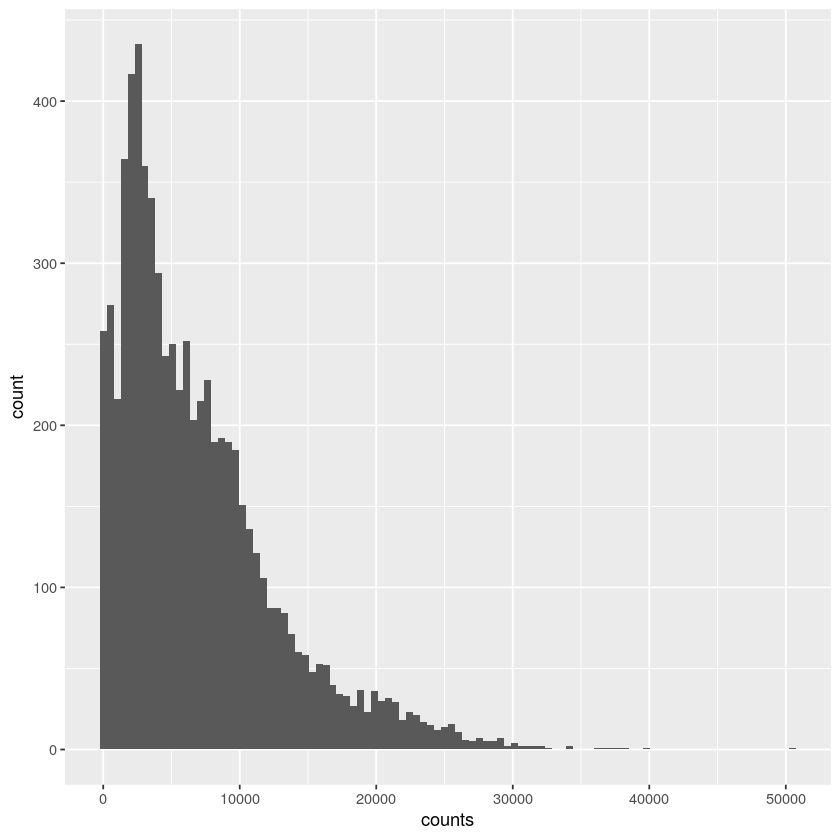

In [408]:
#Some metagenomes have shit depth. Filter those. More specifically, remove those with less than 500 mapped counts
dataMetaAdaptedTruncLongAll %>% filter(taxon != "-1") %>% group_by(Sample_ID) %>% summarize(counts = sum(count)) %>% ggplot(aes(x = counts)) + geom_histogram(bins = 100)
print(dataMetaAdaptedTruncLongAll %>% filter(taxon != "-1") %>% group_by(Sample_ID) %>% summarize(counts = sum(count)) %>% filter(counts < rarefyDepth) %>% dim())

In [409]:
samplesToKill <- dataMetaAdaptedTruncLongAll %>% 
filter(taxon != "-1") %>%
group_by(Sample_ID) %>%
summarize(counts = sum(count)) %>%
filter(counts < rarefyDepth) %>%
pull(Sample_ID)

dataMetaAdaptedTruncLongAll <- dataMetaAdaptedTruncLongAll %>%
filter(!Sample_ID %in% samplesToKill)

`summarise()` ungrouping output (override with `.groups` argument)


In [413]:
#TODO: Also check the unmapped fraction over samples to find samples that might be weird?
UnassignedFractionInfo <- dataMetaAdaptedTruncLongAll %>%
    group_by(Sample_ID) %>%
    mutate(relAb = count / sum(count)) %>%
    filter(taxon == '-1') %>%
    arrange(desc(relAb)) %>%
    left_join(dataMetaAdaptedTruncLongAll %>% group_by(Sample_ID) %>% summarize(totalDepth = sum(count)), by = 'Sample_ID')

`summarise()` ungrouping output (override with `.groups` argument)


In [422]:
UnassignedFractionInfo %>% print(n=30)

# A tibble: 6,544 x 8
# Groups:   Sample_ID [6,544]
   taxon Sample_ID    count caseControls dataset      condition relAb totalDepth
   <chr> <chr>        <dbl> <chr>        <chr>        <chr>     <dbl>      <dbl>
 1 -1    M2061C23_MG   1218 control      Lloyd-Price… UC/CD     0.464       2627
 2 -1    MetaHIT-MH0…  9972 control      LeChatelier… OB        0.431      23139
 3 -1    M2061C21_MG   1223 control      Lloyd-Price… UC/CD     0.399       3062
 4 -1    NG-5636_370   1205 case         Karlsson_20… T2D       0.258       4678
 5 -1    CCIS3876545…  4288 case         Zeller_2014… CRC       0.249      17240
 6 -1    713B037-11-…  4110 case         Kushugolova… MS        0.248      16552
 7 -1    M2061C14_MG    736 control      Lloyd-Price… UC/CD     0.238       3086
 8 -1    MetaHIT-MH0…  5170 control      LeChatelier… OB        0.223      23198
 9 -1    ZSL-146       3059 case         Jie_2017_Na… ACVD      0.204      14990
10 -1    SAMEA3136660  1606 control      Feng_2015_N… ADA

In [411]:
#Get Rarefied counts for fair diversity score calculations
getRarefiedCountTable <- function(countTable, rarefyDepth) {
    set.seed(1)
    countTableRarefied <- countTable %>% 
    # I explicitly resample using the unmapped fraction. It's going to be gone later, anyway :)
    left_joinate(taxon = as.factor(taxon)) %>%
    group_by(Sample_ID) %>%
    nest() %>% 
   #mutate(N = map_dbl(data, function(x) dim(x)[1] %>% return())) %>%
    mutate(data = map(data, function(x) {
        x <- x %>% arrange(taxon)
        tmp <- table(factor(sample(x = x$taxon, size = rarefyDepth, prob = x$count, replace = T), levels = levels(x$taxon)))
        stopifnot(all(names(tmp) == x$taxon))
        x$count_resampled <- as.vector(tmp)
        return(x %>%
              select(-count))
    })) %>%
    unnest()
   
    return(countTableRarefied)
}

In [412]:
dataMetaAdaptedTruncLongAllRarefied <- getRarefiedCountTable(dataMetaAdaptedTruncLongAll, rarefyDepth)

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(data)`”


In [415]:
# Get relative abundances
dataMetaAdaptedTruncLongAll <- dataMetaAdaptedTruncLongAll %>%
group_by(Sample_ID) %>%
mutate(relAb = count / sum(count)) %>%
# Remove unmapped fraction
filter(taxon != "-1")

In [416]:
dataMetaAdaptedTruncLongAllRarefied <- dataMetaAdaptedTruncLongAllRarefied %>%
group_by(Sample_ID) %>%
mutate(relAb = count_resampled / sum(count_resampled)) %>%
# Remove unmapped fraction
filter(taxon != "-1")

# Check that each sample contains the union of all taxa... then pivot_wider.
stopifnot(length(unique(dataMetaAdaptedTruncLongAll %>% group_by(Sample_ID) %>% tally() %>% pull(n))) == 1)

dataMetaAdaptedTruncWideAll <- dataMetaAdaptedTruncLongAll %>%
pivot_wider(id_cols = taxon, names_from = Sample_ID, values_from = relAb)

stopifnot(length(unique(dataMetaAdaptedTruncLongAllRarefied %>% group_by(Sample_ID) %>% tally() %>% pull(n))) == 1)

dataMetaAdaptedTruncWideAllRarefied <- dataMetaAdaptedTruncLongAllRarefied %>%
mutate(taxon = as.character(taxon)) %>%
filter(taxon != '-1') %>%
pivot_wider(id_cols = taxon, names_from = Sample_ID, values_from = relAb)

In [417]:
metaDataWGS <- dataMetaAdaptedTruncLongAll %>% 
ungroup() %>%
select(Sample_ID, caseControls, dataset, condition) %>% 
distinct() %>%
mutate(caseControls = str_replace(string = caseControls, 
                                  pattern = "CTR", 
                                  "control")) %>%
                      as.data.frame() %>%
                      mutate(caseControls = as.factor(caseControls))

In [418]:
dataMetaAdaptedTruncWideAll <- dataMetaAdaptedTruncWideAll %>%
as.data.frame()
rownames(dataMetaAdaptedTruncWideAll) <- dataMetaAdaptedTruncWideAll$taxon
dataMetaAdaptedTruncWideAll$taxon <- NULL

dataMetaAdaptedTruncWideAllRarefied <- dataMetaAdaptedTruncWideAllRarefied %>%
as.data.frame()
rownames(dataMetaAdaptedTruncWideAllRarefied) <- dataMetaAdaptedTruncWideAllRarefied$taxon
dataMetaAdaptedTruncWideAllRarefied$taxon <- NULL

In [419]:
rownames(metaDataWGS) <- metaDataWGS$Sample_ID
metaDataWGS$Sample_ID <- NULL

In [420]:
# Calculcate diversity estimates. Later on join onto metaDataWGS.
# TODO: Check if richness == richnessWithCutoff. I think it is due to subsampling.
allDat <- getFeatures(dataMetaAdaptedTruncWideAllRarefied, metaDataWGS) 
morePredictorNames <- allDat[[2]]
allDat <- allDat[[1]]    
nn <- names(allDat)                           
stopifnot(all(map_dbl(allDat, length) == dim(dataMetaAdaptedTruncWideAll)[2]))    

tmpData <- matrix(unlist(allDat), byrow = T, nrow = length(allDat)) %>%
                                 as.data.frame()
colnames(tmpData) <- colnames(dataMetaAdaptedTruncWideAll)
rownames(tmpData) <- nn   
tmpData <- t(tmpData)
stopifnot(all(rownames(tmpData) == rownames(metaDataWGS)))
metaDataWGS <- metaDataWGS %>% 
                                 as.data.frame() %>% 
                                 mutate(sampleID = rownames(.)) %>% 
                                 left_join(tmpData %>% 
                                           as.data.frame() %>% 
                                           mutate(sampleID = rownames(.)), 
                                           by ='sampleID')                                
rownames(metaDataWGS) <- metaDataWGS$sampleID
metaDataWGS$sampleID <- NULL

In [351]:
read_tsv('../data/motus2.6_taxonomy_NCBI.tax') %>% head()

Parsed with column specification:
cols(
  mOTUs_ID = col_character(),
  Kingdom = col_character(),
  Phylum = col_character(),
  Class = col_character(),
  Order = col_character(),
  Family = col_character(),
  Genus = col_character(),
  Species = col_character(),
  profiled = col_character()
)



mOTUs_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,profiled
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ref_mOTU_v25_11388,2 Bacteria,1239 Firmicutes,186801 Clostridia,68295 Thermoanaerobacterales,543371 Thermoanaerobacterales Family III. Incertae Sedis,159730 Thermovenabulum,520767 Thermovenabulum gondwanense,520767 Thermovenabulum gondwanense [ref_mOTU_v25_11388]
ref_mOTU_v25_02118,2 Bacteria,1239 Firmicutes,186801 Clostridia,186802 Clostridiales,1491775 Proteinivoraceae,42447 Anaerobranca,108328 Anaerobranca gottschalkii,108328 Anaerobranca gottschalkii [ref_mOTU_v25_02118]
ref_mOTU_v25_12184,2 Bacteria,976 Bacteroidetes,768503 Cytophagia,768507 Cytophagales,NA Cytophagales fam. incertae sedis,1433993 Chryseolinea,947013 Chryseolinea serpens,947013 Chryseolinea serpens [ref_mOTU_v25_12184]
ref_mOTU_v25_06844,2 Bacteria,1239 Firmicutes,186801 Clostridia,186802 Clostridiales,186807 Peptococcaceae,1562 Desulfotomaculum,74701 Desulfotomaculum putei,74701 Desulfotomaculum putei [ref_mOTU_v25_06844]
ref_mOTU_v25_05295,2 Bacteria,201174 Actinobacteria,1760 Actinobacteria,85006 Micrococcales,145360 Sanguibacteraceae,60919 Sanguibacter,60920 Sanguibacter keddieii,60920 Sanguibacter keddieii [ref_mOTU_v25_05295]
ref_mOTU_v25_01391,2 Bacteria,1224 Proteobacteria,28211 Alphaproteobacteria,356 Rhizobiales,82115 Rhizobiaceae,357 Agrobacterium,358 Agrobacterium tumefaciens,358 Agrobacterium tumefaciens [ref_mOTU_v25_01391]


In [349]:
metaDataWGS

,caseControls,dataset,condition,richness,richnessWithCutoff,richnessAbsentInHC,richnessWithCutoffAbsentInHCWithCutoff,cumAbundanceAbsentInHC,cumAbundanceAbsentInHCWithCutoff,richnessPresentInHC,richnessWithCutoffPresentInHCWithCutoff,cumAbundancePresentInHC,cumAbundancePresentInHCWithCutoff,topTaxonRelAb,topTaxaRelAb
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAMEA3136748,case,Feng_2015_NatComm,CRC,87,87,8,8,0.022,0.022,18,18,0.350,0.350,0.064,0.013666667
SAMEA3136648,control,Feng_2015_NatComm,CRC,100,100,27,27,0.260,0.260,13,13,0.190,0.190,0.110,0.017000000
SAMEA3136638,control,Feng_2015_NatComm,CRC,99,99,14,14,0.040,0.040,18,18,0.382,0.382,0.078,0.003666667
SAMEA3136670,control,Feng_2015_NatComm,CRC,93,93,15,15,0.058,0.058,14,14,0.272,0.272,0.086,0.004666667
SAMEA3136657,control,Feng_2015_NatComm,CRC,49,49,16,16,0.162,0.162,7,7,0.276,0.276,0.150,0.006500000
SAMEA3136660,control,Feng_2015_NatComm,CRC,75,75,17,17,0.050,0.050,10,10,0.340,0.340,0.208,0.008800000
SAMEA3136769,case,Feng_2015_NatComm,CRC,49,49,10,10,0.064,0.064,6,6,0.156,0.156,0.204,0.005000000
SAMEA3136630,control,Feng_2015_NatComm,CRC,107,107,27,27,0.164,0.164,14,14,0.360,0.360,0.068,0.003714286
SAMEA3136751,case,Feng_2015_NatComm,CRC,124,124,25,25,0.118,0.118,13,13,0.142,0.142,0.122,0.003000000


In [ ]:
# Check correlations between dataMetaAdaptedTruncWideAll and dataMetaAdaptedTruncWideAllRarefied at this point

In [421]:
save(metaDataWGS, dataMetaAdaptedTruncWideAll, dataMetaAdaptedTruncWideAllRarefied, file = '/g/scb2/zeller/karcher/dysb_classif/data/siamcat/profiles_merged_with_metadata.rimage')
metaDataWGS %>% write_tsv("/g/scb2/zeller/karcher/dysb_classif/data/siamcat/metaDataWGS.tsv")
dataMetaAdaptedTruncWideAll %>% write_tsv("/g/scb2/zeller/karcher/dysb_classif/data/siamcat/dataMetaAdaptedTruncWideAll.tsv")
dataMetaAdaptedTruncWideAllRarefied %>% write_tsv("/g/scb2/zeller/karcher/dysb_classif/data/siamcat/dataMetaAdaptedTruncWideAllRarefied.tsv")